# Week 5 - Logistic Regression and Classification Error Metrics

## Introduction

We will be using the [Human Activity Recognition with Smartphones](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) database, which was built from the recordings of study participants performing activities of daily living (ADL) while carrying a smartphone with an embedded inertial sensors. The objective is to classify activities into one of the six activities (walking, walking upstairs, walking downstairs, sitting, standing, and laying) performed.

Alternatively the same data set can be found at https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones/downloads/human-activity-recognition-with-smartphones.zip
The train file can be renamed as Human_Activity_Recognition_Using_Smartphones_Data.csv 

For each record in the dataset it is provided: 

- Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration. 
- Triaxial Angular velocity from the gyroscope. 
- A 561-feature vector with time and frequency domain variables. 
- Its activity label. 

More information about the features is available on the website above.

In [1]:
from __future__ import print_function
import os
#Data Path has to be set as per the file location in your system
#data_path = ['..', 'data']
data_path = ['data']

## Question 1

Import the data and do the following:

* Examine the data types--there are many columns, so it might be wise to use value counts
* Determine if the floating point values need to be scaled
* Determine the breakdown of each activity
* Encode the activity label as an integer

In [2]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
filepath = '/content/drive/My Drive/Colab Notebooks/Datasets/Human_Activity_Recognition_Using_Smartphones_Data.csv'

In [5]:
data = pd.read_csv(filepath)
data

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10294,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,WALKING_UPSTAIRS
10295,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,WALKING_UPSTAIRS
10296,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,WALKING_UPSTAIRS
10297,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,WALKING_UPSTAIRS


The data columns are all floats except for the activity label.

In [6]:
data.dtypes.value_counts()

float64    561
object       1
dtype: int64

In [7]:
data.dtypes.tail()

angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
dtype: object

The data are all scaled from -1 (minimum) to 1.0 (maximum).

In [8]:
data.iloc[:, :-1].min().value_counts()

-1.0    561
dtype: int64

In [9]:
data.iloc[:, :-1].max().value_counts()

1.0    561
dtype: int64

Examine the breakdown of activities--they are relatively balanced.

In [10]:
data.Activity.value_counts()

LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64

Scikit learn classifiers won't accept a sparse matrix for the prediction column. Thus, either `LabelEncoder` needs to be used to convert the activity labels to integers, or if `DictVectorizer` is used, the resulting matrix must be converted to a non-sparse array.  
Use `LabelEncoder` to fit_transform the "Activity" column, and look at 5 random values.

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Activity'] = le.fit_transform(data.Activity)
data['Activity'].sample(20)

7070     3
1583     4
8686     4
6661     1
1929     1
10048    3
1755     5
2848     5
3743     3
2377     5
256      3
1212     0
6678     1
4039     1
3762     4
6939     4
927      3
8339     3
6271     2
5130     1
Name: Activity, dtype: int64

In [12]:
data.Activity.value_counts()

0    1944
2    1906
1    1777
3    1722
5    1544
4    1406
Name: Activity, dtype: int64

## Question 2

* Calculate the correlations between the dependent variables.
* Create a histogram of the correlation values
* Identify those that are most correlated (either positively or negatively).

In [13]:
# Calculate the correlation values
feature_cols = data.columns[:-1]
corr_values = data[feature_cols].corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values)

# Make the unused values NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN
    
# Stack the data and convert to a data frame
corr_values = (corr_values.stack().to_frame().reset_index().rename(columns={'level_0':'feature1','level_1':'feature2',0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

A histogram of the absolute value correlations.

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

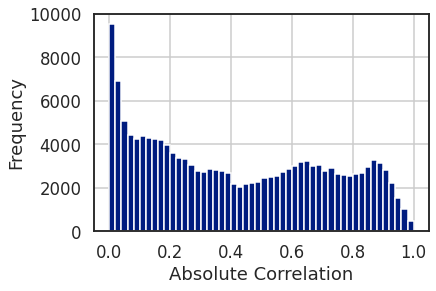

In [15]:
sns.set_context('talk')
sns.set_style('white')
sns.set_palette('dark')

ax = corr_values.abs_correlation.hist(bins=50)

ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

In [16]:
# The most highly correlated values
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.8')

,feature1,feature2,correlation,abs_correlation
156894,fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-sma(),1.000000,1.000000
93902,tBodyAccMag-sma(),tGravityAccMag-sma(),1.000000,1.000000
101139,tBodyAccJerkMag-mean(),tBodyAccJerkMag-sma(),1.000000,1.000000
96706,tGravityAccMag-mean(),tGravityAccMag-sma(),1.000000,1.000000
94257,tBodyAccMag-energy(),tGravityAccMag-energy(),1.000000,1.000000
...,...,...,...,...
22657,tGravityAcc-mean()-Y,"angle(Y,gravityMean)",-0.993425,0.993425
39225,"tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4",-0.994267,0.994267
38739,"tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3",-0.994628,0.994628
23176,tGravityAcc-mean()-Z,"angle(Z,gravityMean)",-0.994764,0.994764


## Question 3

* Split the data into train and test data sets. This can be done using any method, but consider using Scikit-learn's `StratifiedShuffleSplit` to maintain the same ratio of predictor classes.
* Regardless of methods used to split the data, compare the ratio of classes in both the train and test splits.


In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1,test_size=0.3, random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(data[feature_cols], data.Activity))

# Create the dataframes
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'Activity']

X_test  = data.loc[test_idx, feature_cols]
y_test  = data.loc[test_idx, 'Activity']

In [18]:
y_train.value_counts(normalize=True)

0    0.188792
2    0.185046
1    0.172562
3    0.167152
5    0.149951
4    0.136496
Name: Activity, dtype: float64

In [20]:
y_train.value_counts(normalize=False)

0    1361
2    1334
1    1244
3    1205
5    1081
4     984
Name: Activity, dtype: int64

In [19]:
y_test.value_counts(normalize=True)

0    0.188673
2    0.185113
1    0.172492
3    0.167314
5    0.149838
4    0.136570
Name: Activity, dtype: float64

In [21]:
y_test.value_counts(normalize=False)

0    583
2    572
1    533
3    517
5    463
4    422
Name: Activity, dtype: int64

## Question 4

* Fit a logistic regression model without any regularization using all of the features. Be sure to read the documentation about fitting a multi-class model so you understand the coefficient output. Store the model.
* Using cross validation to determine the hyperparameters, fit models using L1, and L2 regularization. Store each of these models as well. Note the limitations on multi-class models, solvers, and regularizations. The regularized models, in particular the L1 model, will probably take a while to fit.

In [22]:
from sklearn.linear_model import LogisticRegression

# Standard logistic regression
lr = LogisticRegression().fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
from sklearn.linear_model import LogisticRegressionCV

# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)

In [ ]:
#Try with different solvers like ‘newton-cg’, ‘lbfgs’, ‘sag’, ‘saga’ and give your observations

In [25]:
# L2 regularized logistic regression
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2').fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

## Question 5

Compare the magnitudes of the coefficients for each of the models. If one-vs-rest fitting was used, each set of coefficients can be plotted separately. 

In [26]:
# Combine all the coefficients into a dataframe
coefficients = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    coeffs = mod.coef_
    coeff_label = pd.MultiIndex(levels=[[lab], [0,1,2,3,4,5]], 
                                 codes=[[0,0,0,0,0,0], [0,1,2,3,4,5]])
    coefficients.append(pd.DataFrame(coeffs.T, columns=coeff_label))

coefficients = pd.concat(coefficients, axis=1)

coefficients.sample(50)

lr                                                          l1  \
            0         1         2         3         4         5         0   
233 -0.111563 -0.050714 -0.098496  0.297602  0.456259 -0.493089  0.000000   
269 -0.066719 -0.040190 -0.231572  0.254619 -0.257717  0.341579  0.000000   
98  -0.021476  0.037209  0.064079 -0.047568  0.124353 -0.156598 -0.076632   
94   0.085128 -0.033374  0.124863 -0.412734  0.142863  0.093255  0.013990   
224  0.027121  0.084399 -0.092861 -0.242213  0.101671  0.121883  0.000000   
49  -1.570710  0.421440  0.758738  0.196441  0.196714 -0.002623 -4.486131   
168 -0.103665 -0.079448 -0.005951  0.214771  0.086445 -0.112152 -0.046644   
377 -0.051910  0.225347 -0.198253  0.272967 -0.253044  0.004892 -0.133072   
354 -0.114551 -0.081022 -0.088299  0.395554 -0.090580 -0.021103 -0.092184   
62   0.155755  0.322355 -0.199398 -1.298826  0.124555  0.895560  0.324930   
217 -0.041007 -0.052088  0.012823  0.213137 -0.269270  0.136405  0.000000   
537 -0.011502  0.189890 -0.113817  0.577337 -0.295826 -0.346083 -0.038177   
498 -0.003009  0.047902  0.090495 -0.093838 -0.094312  0.052762 -0.075724   
481  0.004037  0.062812  0.078384 -0.109627 -0.145743  0.110137 -0.067179   
402 -0.003946  0.052083  0.083233 -0.007062 -0.067357 -0.056950 -0.044744   
470 -0.012602  0.031312  0.073618  0.091618 -0.218297  0.034351 -0.033169   
306 -0.021470  0.012014  0.065642 -0.163253  0.112618 -0.005551  0.000000   
132  0.062809  0.097906 -0.003058  0.241129 -0.378162 -0.020625  0.000000   
456  0.181898  0.098061 -0.266585  0.065716 -0.496958  0.417869  0.000000   
371 -0.049986 -0.045585  0.322104  0.189015  0.073833 -0.489381  0.000000   
556 -0.111714 -0.391907  0.394297 -0.128972  0.378024 -0.139729 -0.107402   
21  -0.010402 -0.009473 -0.130732  0.050559 -0.173252  0.273300  0.091075   
96  -0.062657 -0.011261  0.023915  0.095118 -0.001263 -0.043851 -0.027242   
131 -0.040173 -0.014029 -0.086811  0.011379 -0.412658  0.542292  0.000000   
133  0.028519  0.013390  0.023066  0.257939 -0.100831 -0.222083  0.000000   
549 -0.100527 -0.798242  0.339450  0.300411  0.307312 -0.048404  0.077932   
57   1.383677 -0.287813 -0.698452 -0.359351 -0.586938  0.548878  1.504777   
10   0.012487 -0.209027 -0.013324  0.025519 -0.110940  0.295285  0.000000   
139 -0.078515 -0.195923  0.001295  0.231890 -0.025852  0.067106 -0.015581   
70  -0.095868  0.005304  0.153220 -0.520150 -0.132553  0.590047 -0.842687   
352 -0.078065  0.038301 -0.092838  0.155942  0.227819 -0.251158 -0.049030   
543 -0.059913 -0.152934  0.121529  0.193702  0.098280 -0.200664  0.000000   
465 -0.010543  0.040379  0.070930  0.124399 -0.225983  0.000816 -0.076092   
79  -0.115556 -0.036565  0.104922 -0.226759  0.352354 -0.078396  0.025503   
187  0.008887  0.891128 -0.871854 -0.144212 -0.133534  0.249585 -0.493696   
433 -0.069776  0.030554 -0.158106  0.500834 -0.520843  0.217338  0.000000   
170 -0.049196 -0.075614  0.077740  0.181146 -0.033990 -0.100085  0.000859   
230 -0.080282  0.014239 -0.071686  0.122334 -0.232972  0.248368 -0.076823   
178 -0.028766  0.018390  0.073145 -0.058632  0.032568 -0.036706  0.000000   
508  0.146024  0.008492  0.038578 -0.560676  0.563497 -0.195915  0.160671   
521 -0.064278 -0.008826  0.016913  0.092907  0.144193 -0.180909 -0.034672   
198 -0.067602  0.077496  0.035862  1.250607  0.006069 -1.302431 -0.328801   
337  0.032307  0.091397  0.064434 -0.168948 -0.143681  0.124491  0.036863   
129 -0.036414 -0.221646  0.108246 -0.089718 -0.082488  0.322021 -0.008282   
138 -0.017805  0.058490 -0.008380 -0.104369 -0.052756  0.124821 -0.095918   
334 -0.002606  0.051514  0.084446  0.026816  0.006674 -0.166844 -0.051117   
272 -0.118113 -0.068809 -0.242505  0.222010 -0.011201  0.218618 -0.065563   
423 -0.083022 -0.273321  0.059969  0.068279 -0.005830  0.233925 -0.016208   
141 -0.087743  0.097065 -0.175265 -0.614593  0.083046  0.697490  0.000000   
442 -0.076998 -0.244774  0.093853 -0.166456 -0.265983  0.660358  0.000000   

      

Prepare six separate plots for each of the multi-class coefficients.

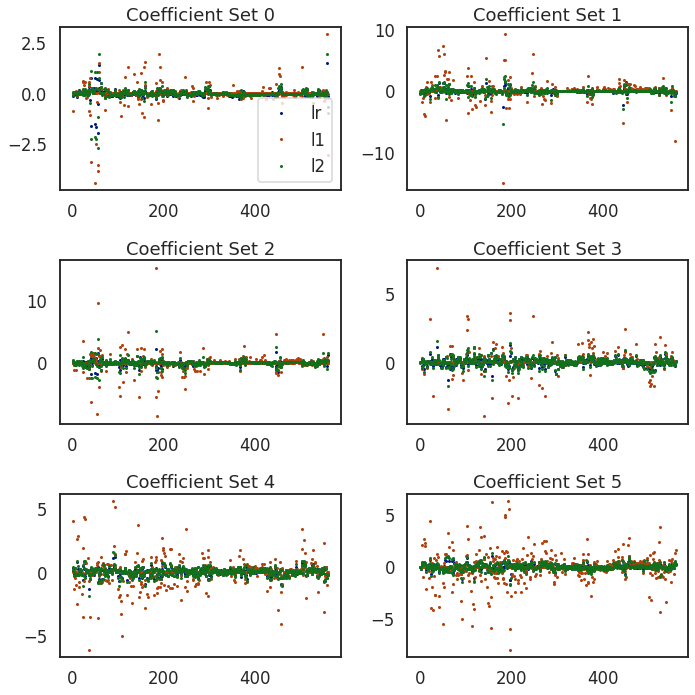

In [27]:
fig, axList = plt.subplots(nrows=3, ncols=2)
axList = axList.flatten()
fig.set_size_inches(10,10)


for ax in enumerate(axList):
    loc = ax[0]
    ax = ax[1]
    
    data = coefficients.xs(loc, level=1, axis=1)
    data.plot(marker='o', ls='', ms=2.0, ax=ax, legend=False)
    
    if ax is axList[0]:
        ax.legend(loc=4)
        
    ax.set(title='Coefficient Set '+str(loc))

plt.tight_layout()


## Question 6

* Predict and store the class for each model.
* Also store the probability for the predicted class for each model. 

In [29]:
# Predict the class and the probability for each

y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred.head(20)


,lr,l1,l2
0,3,3,3
1,5,5,5
2,3,3,3
3,1,1,1
4,0,0,0
5,5,5,5
6,0,0,0
7,2,2,2
8,0,0,0
9,0,0,0


In [30]:
y_prob.head()

,lr,l1,l2
0,0.999995,0.998973,0.999997
1,0.999238,0.999640,0.999663
2,0.997371,0.995329,0.998911
3,0.988741,0.999185,0.997716
4,0.995032,0.999920,0.999453


## Question 7

For each model, calculate the following error metrics: 

* accuracy
* precision
* recall
* fscore
* confusion matrix

Decide how to combine the multi-class metrics into a single value for each model.

In [31]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics = list()
cm = dict()

for lab in coeff_labels:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1,2,3,4,5]),
              label_binarize(y_pred[lab], classes=[0,1,2,3,4,5]), 
              average='weighted')
    
    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)


In [32]:
#Run the metrics
metrics

,lr,l1,l2
precision,0.980246,0.983514,0.983484
recall,0.980259,0.983495,0.983495
fscore,0.980248,0.983492,0.983489
accuracy,0.980259,0.983495,0.983495
auc,0.988042,0.989949,0.989975


## Question 8

Display or plot the confusion matrix for each model.

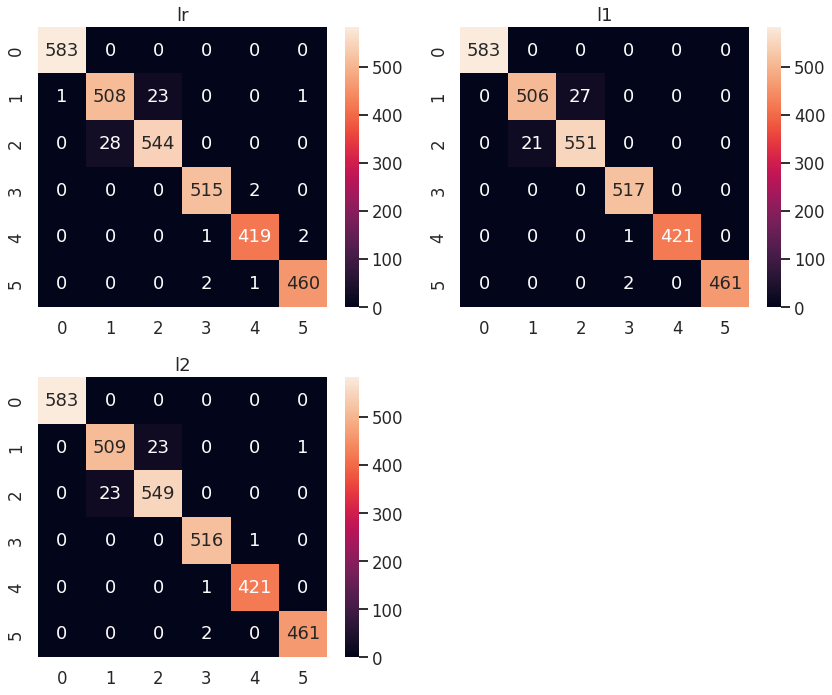

In [33]:

fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);
    
plt.tight_layout()


## Question 9
 Identify highly correlated columns and drop those columns before building models

In [36]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold

#threshold with .7

sel = VarianceThreshold(threshold=(.7 * (1 - .7)))

data2 = pd.concat([X_train,X_test])
data_new = pd.DataFrame(sel.fit_transform(data2))


data_y = pd.concat([y_train,y_test])

from sklearn.model_selection import train_test_split

X_new,X_test_new = train_test_split(data_new)
Y_new,Y_test_new = train_test_split(data_y)

 Repeat Model building with new training data after removing higly correlated columns

In [ ]:
# Try standard, L1 and L2 Logistic regression

In [37]:
lr_new = LogisticRegression().fit(X_new, Y_new)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
lr_l1_new = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_new, Y_new)

In [39]:
lr_l2_new = LogisticRegressionCV(Cs=10, cv=4, penalty='l2').fit(X_new, Y_new)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [ ]:
#Try with different solvers like ‘newton-cg’, ‘lbfgs’, ‘sag’, ‘saga’ and give your observations

## Question 10

Compare the magnitudes of the coefficients for each of the models. If one-vs-rest fitting was used, each set of coefficients can be plotted separately. 

In [57]:
# Combine all the coefficients into a dataframe
coefficients_new = list()

coeff_labels_new = ['lr_new', 'l1_new', 'l2_new']
coeff_models_new = [lr_new, lr_l1_new, lr_l2_new]

for lab, mod in zip(coeff_labels_new, coeff_models_new):
    coeffs_new = mod.coef_
    coeff_label_new = pd.MultiIndex(levels=[[lab], [0, 1, 2, 3, 4, 5]], 
                                 codes=[[0, 0, 0, 0, 0, 0], [0, 1, 2, 3, 4, 5]])
    coefficients_new.append(pd.DataFrame(coeffs_new.T, columns=coeff_label_new))

coefficients_new = pd.concat(coefficients_new, axis=1)

coefficients_new.sample(50)


lr_new                                                   l1_new       \
           0         1         2         3         4         5      0    1   
44  0.076401 -0.025580 -0.277628  0.034113 -0.059757  0.252451    0.0  0.0   
22  0.031414 -0.128549  0.026220 -0.002700  0.014470  0.059145    0.0  0.0   
37 -0.016617  0.359455 -0.238102 -0.666494  0.695073 -0.133316    0.0  0.0   
5  -0.249839  0.189868  0.066298  0.125500 -0.077793 -0.054034    0.0  0.0   
23  0.058091  0.370148 -0.193280 -0.070720  0.104980 -0.269219    0.0  0.0   
2  -0.217450 -0.244235  0.356242  0.139436 -0.026466 -0.007527    0.0  0.0   
47 -0.056924  0.031396 -0.005847  0.055458 -0.017584 -0.006498    0.0  0.0   
48 -0.071897  0.040323 -0.000562  0.040674 -0.008002 -0.000538    0.0  0.0   
40 -0.088164  0.309809 -0.077549  0.072150 -0.043131 -0.173116    0.0  0.0   
43  0.161187 -0.192067 -0.106723  0.304996 -0.442688  0.275294    0.0  0.0   
15  0.305139  0.218288 -0.258201 -0.254908  0.119374 -0.129693    0.0  0.0   
28 -0.182723  0.230344 -0.555240  0.704982 -0.363996  0.166633    0.0  0.0   
49  0.152740  0.252813  0.326895 -0.157907 -0.402389 -0.172152    0.0  0.0   
14  0.245977 -0.181382 -0.072607  0.190674  0.213013 -0.395674    0.0  0.0   
9  -0.019085  0.070472 -0.016926 -0.017630  0.011945 -0.028776    0.0  0.0   
6  -0.012420 -0.090843  0.074046 -0.022027 -0.323658  0.374902    0.0  0.0   
13 -0.022439 -0.664175  0.786788 -0.098591 -0.385759  0.384175    0.0  0.0   
29 -0.524463 -0.036923  0.391882  0.225534  0.099082 -0.155112    0.0  0.0   
30  0.045725  0.126752 -0.179641 -0.249644  0.121718  0.135092    0.0  0.0   
38  0.425067  0.273933 -0.166626 -0.260936 -0.311644  0.040205    0.0  0.0   
32  0.265697 -0.201457  0.439134  0.317737 -0.430573 -0.390538    0.0  0.0   
3  -0.115172  0.240074 -0.175198 -0.056402 -0.103253  0.209951    0.0  0.0   
19  0.058091  0.370148 -0.193280 -0.070720  0.104980 -0.269219    0.0  0.0   
11  0.010923 -0.013430  0.019891  0.022670 -0.019748 -0.020307    0.0  0.0   
42  0.007098  0.444287 -0.052131 -0.085299 -0.049264 -0.264690    0.0  0.0   
10  0.034220  0.043559 -0.046738  0.000599 -0.015840 -0.015801    0.0  0.0   
27 -0.007431 -0.098700  0.155775 -0.040586  0.063841 -0.072899    0.0  0.0   
21 -0.022631  0.027627  0.114446 -0.155969  0.059543 -0.023017    0.0  0.0   
18  0.031414 -0.128549  0.026220 -0.002700  0.014470  0.059145    0.0  0.0   
34 -0.167608 -0.148321  0.276554  0.527617 -0.071989 -0.416253    0.0  0.0   
35 -0.277855  0.253598 -0.317168 -0.221356  0.361146  0.201634    0.0  0.0   
26  0.059941 -0.619032 -0.073267  0.022677  0.389932  0.219749    0.0  0.0   
1   0.260907 -0.200349 -0.353805  0.022835 -0.057524  0.327936    0.0  0.0   
8   0.459181 -0.193062  0.101638 -0.198659  0.014884 -0.183982    0.0  0.0   
25 -0.022631  0.027627  0.114446 -0.155969  0.059543 -0.023017    0.0  0.0   
24  0.031414 -0.128549  0.026220 -0.002700  0.014470  0.059145    0.0  0.0   
16  0.137822  0.087630  0.247848 -0.057739 -0.098143 -0.317418    0.0  0.0   
20  0.031414 -0.128549  0.026220 -0.002700  0.014470  0.059145    0.0  0.0   
33  0.258118 -0.175565 -0.073681  0.098182 -0.252443  0.145388    0.0  0.0   
39 -0.103752  0.129779  0.306562  0.054266 -0.344291 -0.042564    0.0  0.0   
36 -0.050269  0.075150 -0.132601 -0.182929  0.079873  0.210776    0.0  0.0   
31 -0.012241 -0.139157  0.185681  0.081446  0.090180 -0.205909    0.0  0.0   
41  0.037026  0.076648 -0.022641 -0.097028  0.005693  0.000303    0.0  0.0   
12 -0.200505  0.383852 -0.106140 -0.475158  0.287031  0.110920    0.0  0.0   
4  -0.009880  0.078217 -0.035972  0.086075 -0.064988 -0.053451    0.0  0.0   
0  -0.097905  0.124221 -0.008225 -0.135311  0.104670  0.012550    0.0  0.0   
17 -0.149818 -0.108961 -0.136464  0.397988  0.213341 -0.216086    0.0  0.0   
45 -0.320592 -0.559104  0.443243  0.083770  0.122493  0.230192    0.0  0.0   
7  -0.293882  0.459041  0.000935  0.066770 -0.107918 -0.124946    0.0  0.0   
46  0.021187 -0.089735  0.13

Prepare six separate plots for each of the multi-class coefficients.

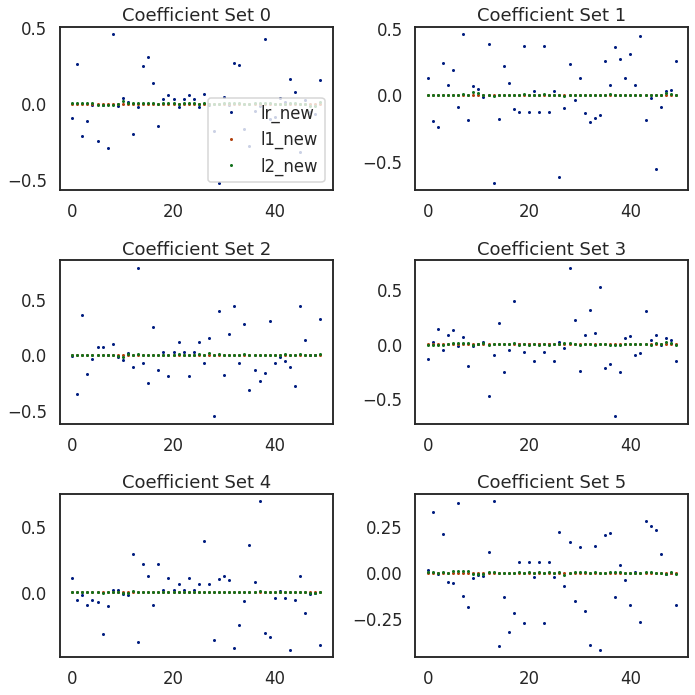

In [58]:
# try the plots
fig_new, axList_new = plt.subplots(nrows=3, ncols=2)
axList_new = axList_new.flatten()
fig_new.set_size_inches(10, 10)


for ax in enumerate(axList_new):
    loc = ax[0]
    ax = ax[1]
    
    data = coefficients_new.xs(loc, level=1, axis=1)
    data.plot(marker='o', ls='', ms=2.0, ax=ax, legend=False)
    
    if ax is axList_new[0]:
        ax.legend(loc=4)
        
    ax.set(title='Coefficient Set '+str(loc))

plt.tight_layout()


## Question 11

* Predict and store the class for each model.
* Also store the probability for the predicted class for each model. 

In [59]:
# Predict the class and the probability for each
y_pred_new = list()
y_prob_new = list()

coeff_labels_new = ['lr_new', 'l1_new', 'l2_new']
coeff_models_new = [lr_new, lr_l1_new, lr_l2_new]

for lab,mod in zip(coeff_labels_new, coeff_models_new):
    y_pred_new.append(pd.Series(mod.predict(X_test_new), name=lab))
    y_prob_new.append(pd.Series(mod.predict_proba(X_test_new).max(axis=1), name=lab))
    
y_pred_new = pd.concat(y_pred_new, axis=1)
y_prob_new = pd.concat(y_prob_new, axis=1)

y_pred_new.head(20)


,lr_new,l1_new,l2_new
0,1,0,1
1,1,0,2
2,0,0,0
3,2,0,2
4,2,0,2
5,3,0,2
6,0,0,2
7,0,0,2
8,0,0,2
9,5,0,2


In [60]:
y_prob_new.head()

,lr_new,l1_new,l2_new
0,0.230170,0.166667,0.186807
1,0.222201,0.166667,0.186096
2,0.220948,0.166667,0.198865
3,0.251163,0.166667,0.193774
4,0.207616,0.166667,0.190573


## Question 12

For each model, calculate the following error metrics: 

* accuracy
* precision
* recall
* fscore
* confusion matrix

Decide how to combine the multi-class metrics into a single value for each model.

In [61]:
# Calculate the error metrics as listed above
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics_new = list()
cm_new = dict()

for lab in coeff_labels_new:

    # Preciision, recall, f-score from the multi-class support function
    precision_new, recall_new, fscore_new, _ = score(Y_test_new, y_pred_new[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy_new = accuracy_score(Y_test_new, y_pred_new[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc_new = roc_auc_score(label_binarize(Y_test_new, classes=[0,1,2,3,4,5]),
              label_binarize(y_pred_new[lab], classes=[0,1,2,3,4,5]), 
              average='weighted')
    
    # Last, the confusion matrix
    cm_new[lab] = confusion_matrix(Y_test_new, y_pred_new[lab])
    
    metrics_new.append(pd.Series({'precision':precision_new, 'recall':recall_new, 
                              'fscore':fscore_new, 'accuracy':accuracy_new,
                              'auc':auc_new}, 
                             name=lab))

metrics_new = pd.concat(metrics_new, axis=1)


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
#Run the metrics
metrics_new

,lr_new,l1_new,l2_new
precision,0.137448,0.038158,0.095230
recall,0.189903,0.195340,0.187573
fscore,0.152701,0.063844,0.113504
accuracy,0.189903,0.195340,0.187573
auc,0.507413,0.500000,0.502452


## Question 13

Display or plot the confusion matrix for each model.

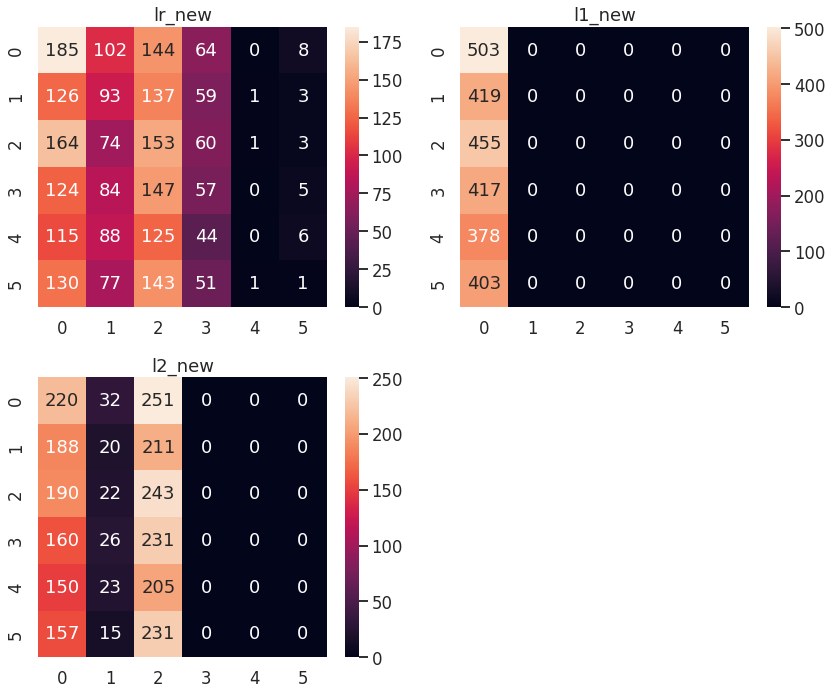

In [73]:
fig, axList_new = plt.subplots(nrows=2, ncols=2)
axList_new = axList_new.flatten()
fig.set_size_inches(12, 10)

axList_new[-1].axis('off')

for ax,lab in zip(axList_new[:-1], coeff_labels_new):
    sns.heatmap(cm_new[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);

plt.tight_layout()

In [64]:
# Perform a comparison of the outputs between Question 7 and 12 and give your observation
metrics_comparison = pd.concat([metrics, metrics_new], axis=1)
metrics_comparison

,lr,l1,l2,lr_new,l1_new,l2_new
precision,0.980246,0.983514,0.983484,0.137448,0.038158,0.095230
recall,0.980259,0.983495,0.983495,0.189903,0.195340,0.187573
fscore,0.980248,0.983492,0.983489,0.152701,0.063844,0.113504
accuracy,0.980259,0.983495,0.983495,0.189903,0.195340,0.187573
auc,0.988042,0.989949,0.989975,0.507413,0.500000,0.502452


Observation:
The values for the new model show much lower values for all the metrics. This suggests that the new model is performing much worse than the original model. The precision, recall, f-score, and accuracy values are all much lower, indicating that the new model is making more errors in its predictions. The AUC value is also significantly lower, indicating that the new model is less effective at distinguishing between the different classes. This is due to we drop highly correlated columns.

In [ ]:
# Perform a comparison of the outputs between Question 8 and 13 and give your observation

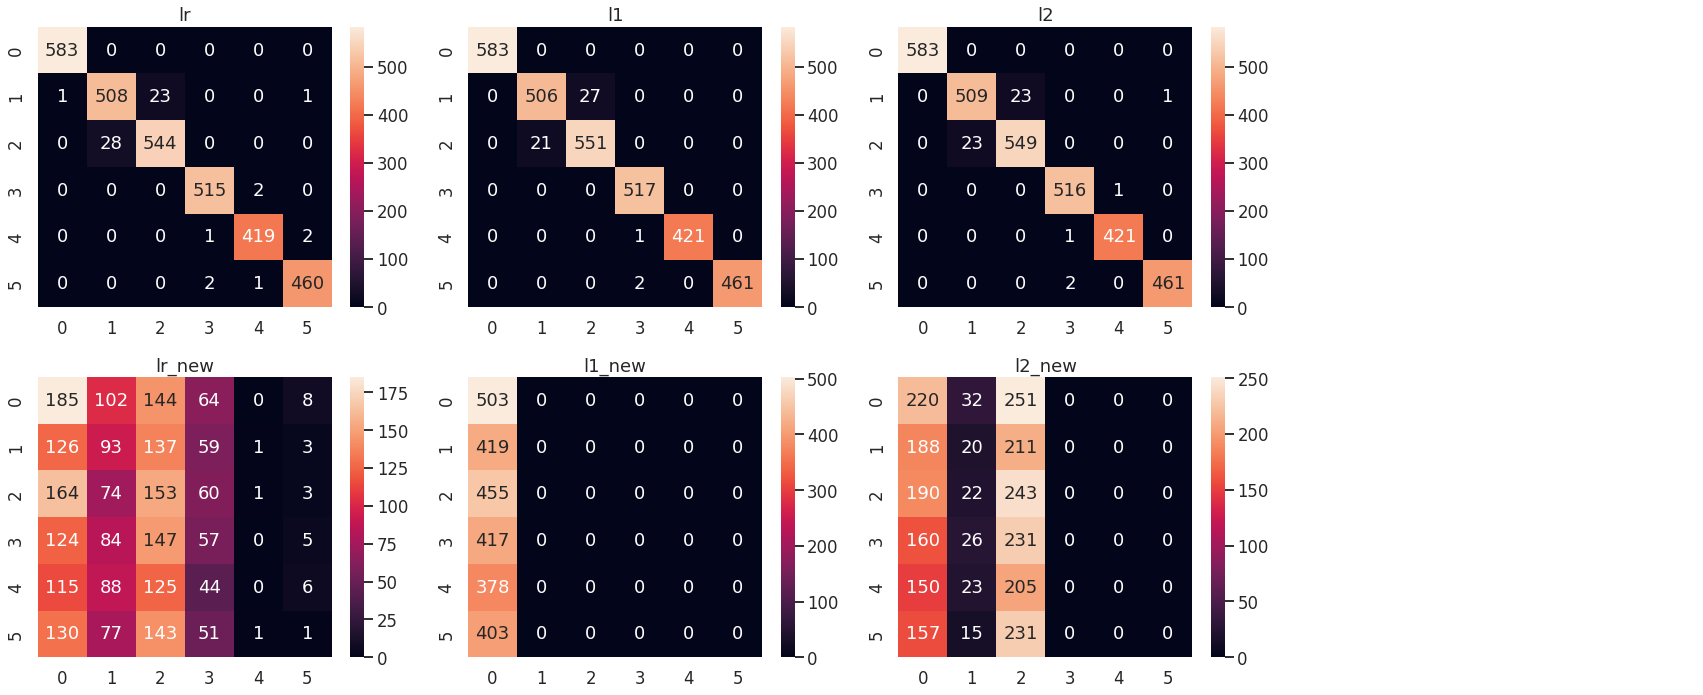

In [71]:
fig, axList = plt.subplots(nrows=2, ncols=4)
fig.set_size_inches(24, 10)

axList[0, 3].axis('off')
axList[1, 3].axis('off')

for ax,lab in zip(axList[0, :-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d')
    ax.set(title=lab)

for ax,lab in zip(axList[1, :-1], coeff_labels_new):
    sns.heatmap(cm_new[lab], ax=ax, annot=True, fmt='d')
    ax.set(title=lab)

plt.tight_layout()


Observation: If the values are concentrated on one side of the matrix, it indicates that the classifier is misclassifying most of the samples in that particular class. In the case of the l1_new model, the large values being straight vertically and zeros in other columns may indicate that the model is overfitting to one class and not performing well on the others. It may also suggest that there is an imbalance in the dataset or that the model has been trained on a biased sample. 